<a href="https://colab.research.google.com/github/mark3000-010701/Dataanalyst/blob/main/B%C3%A0i_T%E1%BA%ADp_Pandas_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **[Bài tập] Phân tích trên bộ dữ liệu GPD List**

In [ ]:
import pandas as pd


# 1. Đọc bộ dữ liệu, cho biết số dòng, số cột và kiểu dữ liệu của các thuộc tính.

In [ ]:
df = pd.read_csv('https://s3.ap-southeast-1.amazonaws.com/learn.codegym.vn/media/public/2021/12/31020936/GDPlist.csv',encoding='ISO-8859-1')
df.head()

,Country,Continent,GDP (millions of US$)
0,Afghanistan,Asia,18181
1,Albania,Europe,12847
2,Algeria,Africa,190709
3,Angola,Africa,100948
4,Argentina,South America,447644


In [ ]:
df.columns

Index(['Country', 'Continent', 'GDP (millions of US$)'], dtype='object')

In [ ]:
df.shape

(125, 3)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Country                125 non-null    object
 1   Continent              125 non-null    object
 2   GDP (millions of US$)  125 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 3.1+ KB


In [ ]:
df.dtypes

Country                  object
Continent                object
GDP (millions of US$)     int64
dtype: object

# 2. Tính giá trị lớn nhất và nhỏ nhất của GDP.

In [ ]:
df['GDP (millions of US$)'].max()

15094025

In [ ]:
df['GDP (millions of US$)'].min()

10600

# 3. Hãy cho biết xu hướng phân bố dữ liệu của GDP.

In [ ]:
tg = df['GDP (millions of US$)']
tg

0       18181
1       12847
2      190709
3      100948
4      447644
        ...  
120     45353
121    315841
122    122722
123     33675
124     19206
Name: GDP (millions of US$), Length: 125, dtype: int64

(array([114.,   7.,   1.,   1.,   1.,   0.,   0.,   0.,   0.,   1.]),
 array([1.06000000e+04, 1.51894250e+06, 3.02728500e+06, 4.53562750e+06,
        6.04397000e+06, 7.55231250e+06, 9.06065500e+06, 1.05689975e+07,
        1.20773400e+07, 1.35856825e+07, 1.50940250e+07]),
 <a list of 10 Patch objects>)

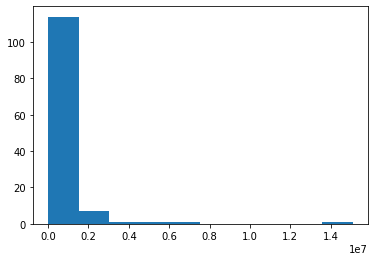

In [ ]:
import matplotlib.pyplot as plt
plt.hist(tg)

{'boxes': [<matplotlib.lines.Line2D at 0x7fe105c95190>],
 'caps': [<matplotlib.lines.Line2D at 0x7fe106143b90>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fe106159210>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fe1062f4dd0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fe105c95e10>,
  <matplotlib.lines.Line2D at 0x7fe105c95f10>]}

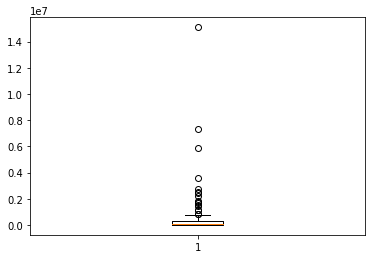

In [ ]:
plt.boxplot(tg)

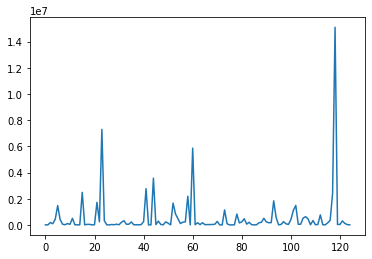

In [ ]:
plt.plot(tg)

# 4. Hãy cho biết châu lục nào xuất hiện nhiều nhất?

In [ ]:
cl = df['Continent'].mode()
cl


0    Europe
dtype: object

# 5. Với mỗi châu lục hãy tính tổng GDP; trung bình cộng GDP. Hợp nhất 2 bảng này thành một bảng duy nhất gồm 3 thông tin: Tên châu lục; Tổng GDP; TBC GDP.

In [ ]:
df1 = df.groupby(['Continent'])['GDP (millions of US$)'].sum().reset_index(name='Tổng GDP')
df1

,Continent,Tổng GDP
0,Africa,1820811
1,Asia,24425891
2,Europe,19139380
3,North America,18238447
4,Oceania,1662727
5,South America,4141217


In [ ]:
df2 = df.groupby(['Continent'])['GDP (millions of US$)'].mean().reset_index(name='TBC GDP')
df2

,Continent,TBC GDP
0,Africa,6.278659e+04
1,Asia,6.784970e+05
2,Europe,5.172805e+05
3,North America,1.658041e+06
4,Oceania,5.542423e+05
5,South America,4.601352e+05


In [ ]:
df3 = pd.concat([df1,df2],axis=1)
df3

,Continent,Tổng GDP,Continent,TBC GDP
0,Africa,1820811,Africa,6.278659e+04
1,Asia,24425891,Asia,6.784970e+05
2,Europe,19139380,Europe,5.172805e+05
3,North America,18238447,North America,1.658041e+06
4,Oceania,1662727,Oceania,5.542423e+05
5,South America,4141217,South America,4.601352e+05


In [ ]:
df4 = pd.merge(df1,df2,on='Continent')
df4

,Continent,Tổng GDP,TBC GDP
0,Africa,1820811,6.278659e+04
1,Asia,24425891,6.784970e+05
2,Europe,19139380,5.172805e+05
3,North America,18238447,1.658041e+06
4,Oceania,1662727,5.542423e+05
5,South America,4141217,4.601352e+05


# **[Bài tập] Phân tích trên bộ dữ liệu Online Retail**

In [ ]:
import pandas as pd

# 1. Đọc bộ dữ liệu, cho biết số dòng, số cột và kiểu dữ liệu của các thuộc tính

In [ ]:
data = pd.read_csv('https://s3.ap-southeast-1.amazonaws.com/learn.codegym.vn/media/public/2021/12/31011319/OnlineRetail.csv',encoding='ISO-8859-1')
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [ ]:
data.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [ ]:
data.shape

(541909, 8)

In [ ]:
print('so dong',data.shape[0])

so dong 541909


In [ ]:
print('so cot',data.shape[1])

so cot 8


# 2. Xây dựng bảng Pivot table, với mỗi Số hóa đơn tính trung bình cộng số lượng các mặt hàng theo từng Quốc gia. 

In [ ]:
data1=pd.privot_table(data,values='Quantity',index='InvoiceNo',columns='Country',aggfunc ='mean')

In [ ]:
import pandas

In [ ]:
!pip install pandas==1.4.1

In [ ]:
!pip install --upgrade pandas

In [ ]:
pd.__version__

'1.3.5'

In [ ]:
k =pandas.privot_table(data,values='Quantity',index='InvoiceNo',columns='Country',aggfunc ='mean')

# 3. Xây dựng bảng Pivot table, với mỗi Khách hàng cho biết số lượng mua hàng lớn nhất và nhỏ nhất theo Kho.

In [ ]:
k1 =pandas.privot_table(data,values='Quantity',index='CustomerID',columns='StockCode',aggfunc ='max')
k2 =pandas.privot_table(data,values='Quantity',index='CustomerID',columns='StockCode',aggfunc ='min')

# 4. Xây dựng bảng Pivot table, với mỗi Mã kho tính tổng số lượng các mặt hàng và trung bình cộng giá.

In [ ]:
k3 =pandas.privot_table(data,values='Quantity',columns='StockCode',aggfunc ='sum')
k4 =pandas.privot_table(data,values='UnitPrice',columns='StockCode',aggfunc ='mean')

# 5. Xây dựng bảng Pivot table cho biết tổng số lượng hàng bán được của mỗi ngày.

In [ ]:
k1 =pandas.privot_table(data,values='Quantity',columns='InvoiceDate',aggfunc ='sum')